In [1]:
# 用scikit-learn做聚类分析
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

%matplotlib inline

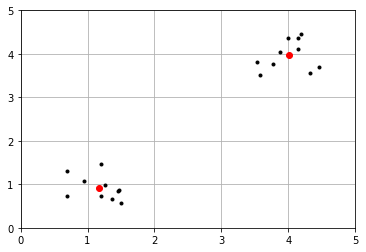

In [2]:
# 构造数据
cluster1 = np.random.uniform(0.5, 1.5, (2, 10))
cluster2 = np.random.uniform(3.5, 4.5, (2, 10))

# 顺序连接两个矩阵，形成一个新矩阵,所以生成了一个2*20的矩阵，T做转置后变成20*2的矩阵,刚好是一堆(x,y)的坐标点
x = np.hstack((cluster1, cluster2)).T
plt.figure()
plt.axis([0, 5, 0, 5])
plt.grid(True)
plt.plot(x[:, 0], x[:, 1], 'k.')
# 使用k-means做聚类
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
plt.plot(kmeans.cluster_centers_[: ,0], kmeans.cluster_centers_[:, 1], 'ro') # 红色为重心点位置

In [3]:
# 肘部法则（现实情况会比以上构造的数据复杂很多，因为直接看根本不知道该聚几个类。）

In [4]:
# 随机生成4个群
cluster1 = np.random.uniform(0.5, 1.5, (2, 10))
cluster2 = np.random.uniform(1.5, 2.5, (2, 10))
cluster3 = np.random.uniform(1.5, 3.5, (2, 10))
cluster4 = np.random.uniform(3.5, 4.5, (2, 10))
x_1 = np.hstack((cluster1, cluster2))
x_2 = np.hstack((cluster3, cluster4))
x = np.hstack((x_1, x_2)).T

In [5]:
k = np.arange(1, 10)
meandistortions = []
for k_ in k:
    kmeans = KMeans(n_clusters=k_)
    kmeans.fit(x)
    # 求kmeans的成本函数值
    meandistortions.append(sum(np.min(cdist(x, kmeans.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])

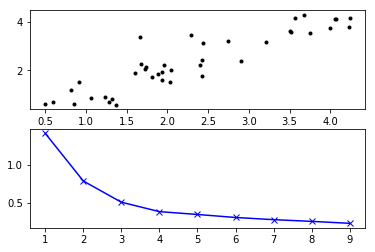

In [6]:
plt.figure()
plt.grid(True)
plt1 = plt.subplot(2, 1, 1)
plt1.plot(x[:,0], x[:, 1], 'k.')
plt2 = plt.subplot(2, 1, 2)
plt2.plot(k, meandistortions, 'bx-') # 根据成本自己选个K吧，貌似4更好好些，9的话粒度太细了。